##COUGHVID DATASET PENETRATION V3##
##2020-12-13##
#Adding covid and other classes of cough sounds#
#test cough records - cough specially separated with pudub silence function##

links:

dataset - https://zenodo.org/record/4048312#.X8vDT8JS-Os

useful materials for cough non cough detection - https://c4science.ch/diffusion/10770/repository/master/

archiv pdf - https://arxiv.org/abs/2009.11644

Totally dataset has anbout 20000 cough sounds. Some of it not cough. 
Most of them not chacked by experts.
Experts checked only 1630 sounds. for couple of it they has different opinion.

I've used onlly experts checked  sounds and also marked like cough sounds with more then 85% probability.

Dataset prepared for test purposes.

Results of other developers
AI4Covid
https://arxiv.org/pdf/2004.01275v5.pdf
Coswara
https://github.com/iiscleap/Coswara-Data
NoCoCoDa
https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9171251

Additional information about mel and sync and bark filters - (by Yury Agafonov)
 https://habr.com/ru/post/462527/

Install tools for convert webm and ogg to wav

In [ ]:
!apt-get install sox ffmpeg
!apt-get install libsox-fmt-mp3

Download and unzip COUGHVID dataset

In [ ]:
!wget https://zenodo.org/record/4048312/files/public_dataset.zip
!unzip public_dataset.zip

In [ ]:
%cd /content/
%rm -rf dataset

/content


In [3]:
%cd /content/
%mkdir dataset
%cd /content/dataset/
%mkdir expert_labeled

/content
/content/dataset


In [ ]:
#prepare only expert labeled cough sounds
%cd /content
import os
import json
from shutil import copyfile, move
import subprocess

all_files = os.listdir('./public_dataset')
for file_name in all_files:
  found_expert_label = 0
  file_name_split = file_name.split(".")
  if file_name_split[1] == "json":
    json_data = json.load(open("./public_dataset/"+file_name, "r"))
    if float(json_data["cough_detected"]) > 0.85:
      if "expert_labels_1" in json_data:
        found_expert_label = 1
      if "expert_labels_2" in json_data:     
        found_expert_label = 1
      if "expert_labels_3" in json_data:     
        found_expert_label = 1
      if True:
        if found_expert_label == 1:
          print(json_data)
          #copyfile("./public_dataset/"+file_name_split[0]+".json", "./dataset/expert_labeled/"+file_name_split[0]+".json")
          if os.path.isfile("./public_dataset/"+file_name_split[0]+".webm"):
            subprocess.call(["ffmpeg", "-i", "./public_dataset/"+file_name_split[0]+".webm", "-acodec", "pcm_s16le", "-ar", "16000", "./public_dataset/"+file_name_split[0]+".wav"])
            #move("./public_dataset/"+file_name_split[0]+".wav", "./dataset/expert_labeled/"+file_name_split[0]+".wav")
          if os.path.isfile("./public_dataset/"+file_name_split[0]+".ogg"):
            subprocess.call(["ffmpeg", "-i", "./public_dataset/"+file_name_split[0]+".ogg", "-acodec", "pcm_s16le", "-ar", "16000", "./public_dataset/"+file_name_split[0]+".wav"])
            #move("./public_dataset/"+file_name_split[0]+".wav", "./dataset/expert_labeled/"+file_name_split[0]+".wav")
          
      

In [5]:
#move all prepared wav sounds to expert_labeled dataset
count_files = 0
all_files = os.listdir('./public_dataset')
for file_name in all_files:
  found_expert_label = 0
  file_name_split = file_name.split(".")
  if file_name_split[1] == "wav":
    count_files += 1
    copyfile("./public_dataset/"+file_name_split[0]+".json", "./dataset/expert_labeled/"+file_name_split[0]+".json")
    move("./public_dataset/"+file_name_split[0]+".wav", "./dataset/expert_labeled/"+file_name_split[0]+".wav")
print(count_files)        

1693


types of expert diagnosis: healthy_cough, lower_infection, upper_infection, obstructive_disease. Sometimes different experts give different diagnosis - we will use each opinion and add sound to each group. 

In [6]:
%cd /content/dataset/
%rm -rf healthy
%rm -rf covid
%rm -rf upper
%rm -rf lower
%rm -rf obstructive
%rm -rf other

/content/dataset


In [6]:
%cd /content/dataset/
%mkdir healthy
%mkdir covid
%mkdir upper
%mkdir lower
%mkdir obstructive
%mkdir other

/content/dataset


In [7]:
#split sounds between groups
# if sound exist in different expert opinion find first nd skip others
%cd /content
import os
import json
from shutil import copyfile

all_files = os.listdir('./dataset/expert_labeled/')
for file_name in all_files:
  file_name_split = file_name.split(".")
  if file_name_split[1] == "json":
    json_data = json.load(open("./dataset/expert_labeled/"+file_name, "r"))
    if float(json_data["cough_detected"]) > 0.85:
      
      if "expert_labels_1" in json_data:
        dir_name = "other"
        if "diagnosis" in json_data["expert_labels_1"]:
          if "healthy" in json_data["expert_labels_1"]["diagnosis"]:
            dir_name = "healthy"
          if "COVID" in json_data["expert_labels_1"]["diagnosis"]:
            dir_name = "covid"
          if "lower" in json_data["expert_labels_1"]["diagnosis"]:
            dir_name = "lower"
          if "upper" in json_data["expert_labels_1"]["diagnosis"]:
            dir_name = "upper"
          if "obstructive" in json_data["expert_labels_1"]["diagnosis"]:
            dir_name = "obstructive"      
        copyfile("./dataset/expert_labeled/"+file_name_split[0]+".json", "./dataset/"+dir_name+"/"+file_name_split[0]+".json")
        copyfile("./dataset/expert_labeled/"+file_name_split[0]+".wav", "./dataset/"+dir_name+"/"+file_name_split[0]+".wav")
        continue
      
      if "expert_labels_2" in json_data:
        dir_name = "other"
        if "diagnosis" in json_data["expert_labels_2"]:
          if "healthy" in json_data["expert_labels_2"]["diagnosis"]:
            dir_name = "healthy"
          if "COVID" in json_data["expert_labels_2"]["diagnosis"]:
            dir_name = "covid"
          if "lower" in json_data["expert_labels_2"]["diagnosis"]:
            dir_name = "lower"
          if "upper" in json_data["expert_labels_2"]["diagnosis"]:
            dir_name = "upper"
          if "obstructive" in json_data["expert_labels_2"]["diagnosis"]:
            dir_name = "obstructive"      
        copyfile("./dataset/expert_labeled/"+file_name_split[0]+".json", "./dataset/"+dir_name+"/"+file_name_split[0]+".json")
        copyfile("./dataset/expert_labeled/"+file_name_split[0]+".wav", "./dataset/"+dir_name+"/"+file_name_split[0]+".wav")
        continue
      
      if "expert_labels_3" in json_data:
        dir_name = "other"
        if "diagnosis" in json_data["expert_labels_3"]:
          if "healthy" in json_data["expert_labels_3"]["diagnosis"]:
            dir_name = "healthy"
          if "COVID" in json_data["expert_labels_3"]["diagnosis"]:
            dir_name = "covid"
          if "lower" in json_data["expert_labels_3"]["diagnosis"]:
            dir_name = "lower"
          if "upper" in json_data["expert_labels_3"]["diagnosis"]:
            dir_name = "upper"
          if "obstructive" in json_data["expert_labels_3"]["diagnosis"]:
            dir_name = "obstructive"      
        copyfile("./dataset/expert_labeled/"+file_name_split[0]+".json", "./dataset/"+dir_name+"/"+file_name_split[0]+".json")
        copyfile("./dataset/expert_labeled/"+file_name_split[0]+".wav", "./dataset/"+dir_name+"/"+file_name_split[0]+".wav")


/content


In [8]:
%cd /content/
%mkdir dataset_base

/content


In [140]:
%cd /content/dataset_base/
%rm -rf healthy
%rm -rf covid
%rm -rf upper
%rm -rf lower
%rm -rf obstructive

/content/dataset_base


In [9]:
%cd /content/dataset_base/
%mkdir healthy
%mkdir covid
%mkdir upper
%mkdir lower
%mkdir obstructive

/content/dataset_base


##Put dataset to base archiv##

In [10]:
#for audio cutting
!pip install pydub

In [ ]:
#length of each sound approximately about 10 seconds and less
#do nothing - only copy files to dataset_base

%cd /content/

import time
from pydub import AudioSegment, effects
import requests
import json
import base64
import wave

dataset_classes = ["covid", "healthy", "lower", "obstructive", "upper"]

for target_class in dataset_classes:
  if not os.path.isdir("./dataset/"+target_class):
    print("check name of class:" + target_class)
    break

  target_files = os.listdir("./dataset/"+target_class)
  count_target_files = len(target_files)

  if count_target_files == 0:
    continue

  file_counter = 0

  for target_file in target_files:
    if os.path.isdir("./dataset/"+target_class+"/"+target_file):
      continue
    
    target_file_part = target_file.split(".")

    if target_file_part[1] == "json":
      continue 

    sound1 = AudioSegment.from_wav("./dataset/"+target_class+"/"+target_file)

    #while len(sound1) < 10000:
      #repeate sound 
    #  sound1 = sound1 + sound1 

    sound1_len = len(sound1)
    print("Processed: "+target_file + " length: "+str(sound1_len))

    new_sound_name = "./dataset_base/"+target_class+"/"+target_file_part[0]+".wav"
    sound1.export(new_sound_name, format="wav")

    """
    sound1_segment_position = 0
    
    file_counter += 1
    counter = 0
    #take first 10000 miliseconds
    while sound1_segment_position < 10000:
      sound1_segment_position_end = sound1_segment_position + 5000
      if sound1_segment_position_end <= sound1_len:
        sound1_segment = sound1[sound1_segment_position:sound1_segment_position_end]
        sound1_segment_dbfs = sound1_segment.dBFS
        sound1_segment_max_dbfs = sound1_segment.max_dBFS

        sound1_segment = effects.normalize(sound1_segment)

        if sound1_segment_dbfs >= - 30 and sound1_segment_max_dbfs >= -5:
          new_sound_name = "./dataset_base/"+target_class+"/"+target_file_part[0]+str(counter)+".wav"
          sound1_segment.export(new_sound_name, format="wav")
      
      sound1_segment_position += 5000
      counter += 1

    print("Files prepared: "+ str(counter))
    if file_counter >= 100000:
      break
    """      


## RESEARCH PART: lets start attempts to find proper way how to split cough##


In [15]:
import tarfile, shutil
import zipfile
import sys, os, urllib.request, tarfile, glob
import numpy as np
import cv2
import librosa
import librosa.core
import librosa.feature
import librosa.display
import matplotlib.pyplot as plt

# wav file Input
def file_load(wav_name, mono=False):
    try:
        return librosa.load(wav_name, sr=None, mono=mono)
    except:
        logger.error("file_broken or not exists!! : {}".format(wav_name))

def make_data(folder_name, id_name):
    result = []
    all_name = glob.glob(folder_name)
    for name in all_name:
        if id_name in name:
            result.append(file_load(name)[0])
    return np.array(result)
    
# change wave data to stft
def to_sp(x, n_fft=512, hop_length=256):
    stft = librosa.stft(x, n_fft=n_fft, hop_length=hop_length)
    sp = librosa.amplitude_to_db(np.abs(stft))
    return sp

def to_img(x):
    result = []
    for i in range(len(x)):
        result.append(cv2.resize(to_sp(x[i]), (224,224)))
    return np.array(result)

def to_img2(x):
    result = cv2.resize(to_sp(x), (224,224))
    return np.array(result)    

In [17]:
%cd /content/
# prepare array for visualisation
x_arr = make_data("./dataset_base/covid/*", "-")

/content


In [18]:
target = np.copy(x_arr[5])

img0 = to_img2(target)

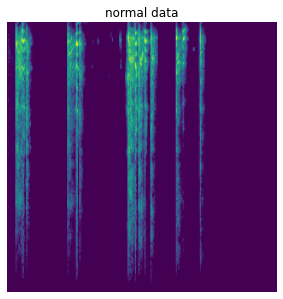

In [19]:
plt.figure(figsize=(28,28))
plt.subplot(1,5,1)
plt.axis("off")
plt.title("normal data")
plt.imshow(img0)

In [111]:
import numpy as np
import random
import itertools
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt

%matplotlib inline

In [121]:
def load_audio_file(file_path):
    input_length = 16000*15
    data = librosa.core.load(file_path)[0]
    if len(data)>input_length:
        data = data[:input_length]
    else:
        data = np.pad(data, (0, max(0, input_length - len(data))), "constant")
    return data

def load_audio_segment(file_path):
    input_length = 16000
    data = librosa.core.load(file_path)[0]
    if len(data)>input_length:
        data = data[:input_length]
    else:
        data = np.pad(data, (0, max(0, input_length - len(data))), "constant")
    return data    
def plot_time_series(data):
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()

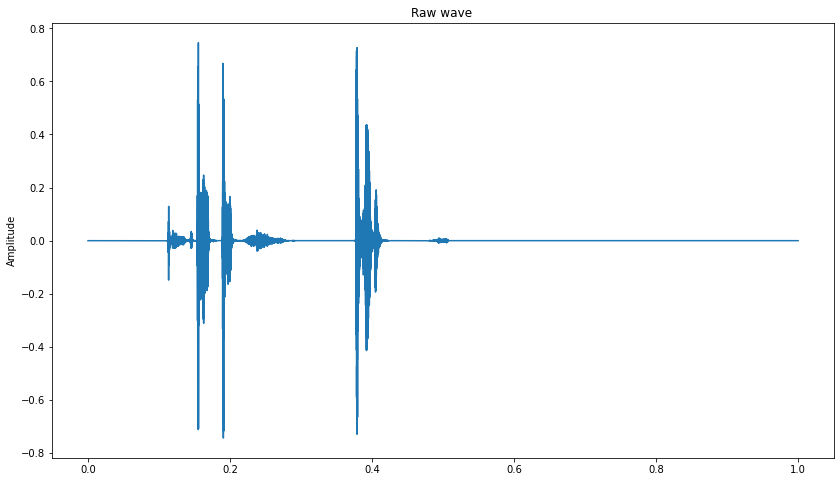

In [138]:
sound_file_name = "/content/dataset_base/lower/07809b76-1f10-424e-853b-cbf4756a8ba2.wav"
data = load_audio_file(sound_file_name)
plot_time_series(data)
ipd.Audio(data, rate=16000)

dbfs: -24.010597579345962
max_dbfs: -0.09997527890305569
len: 5520


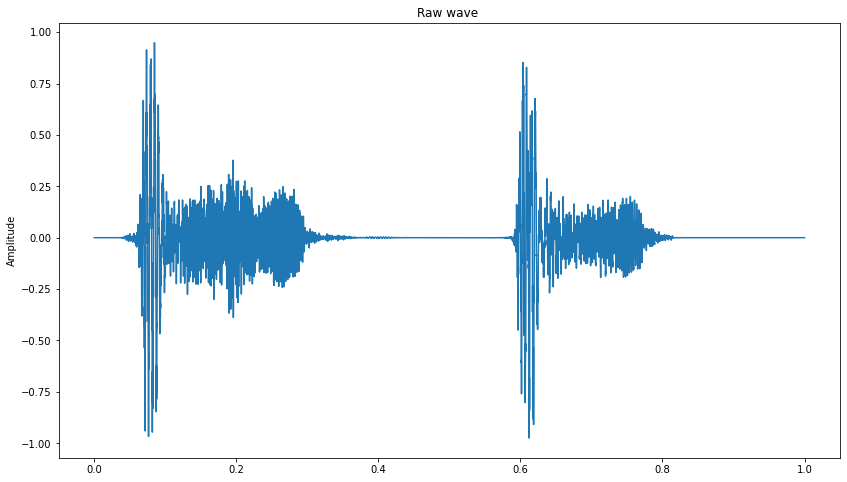

dbfs: -19.255634376950496
max_dbfs: -0.09997527890305569
len: 1000


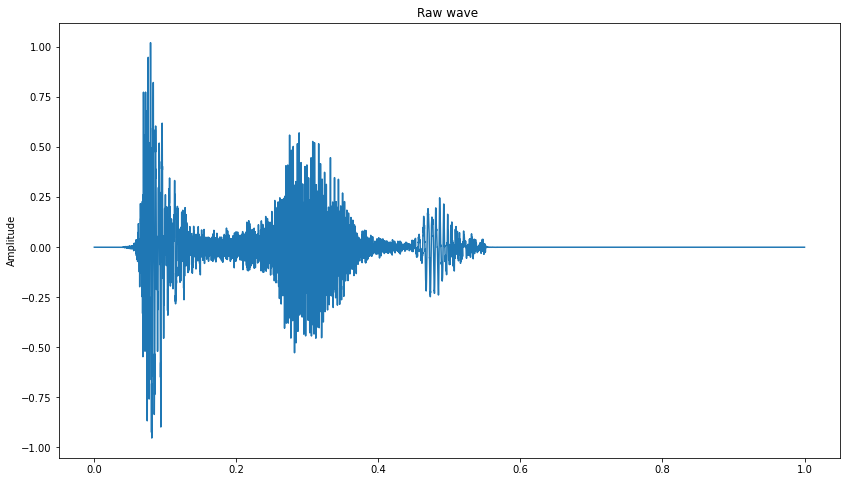

dbfs: -20.041982723075215
max_dbfs: -0.28041852730394495
len: 1000


In [139]:
 from pydub import silence

 sound20 = AudioSegment.from_wav(sound_file_name)
 sound2 = effects.normalize(sound20)
 print("dbfs: "+str(sound2.dBFS))
 print("max_dbfs: "+str(sound2.max_dBFS))
 print("len: "+str(len(sound2)))
 sound2_segments = silence.split_on_silence(sound2, min_silence_len=250, silence_thresh=-30, keep_silence=50)
 
 counter_file = 0
 sound_file_temp_name = sound_file_name.split(".")

 for sound2_segment in sound2_segments:
   if len(sound2_segment) < 300:
     continue
   if sound2_segment.max_dBFS < -10:
     continue  

   if len(sound2_segment) >= 1000:
     sound2_segment = effects.speedup(sound2_segment, playback_speed = len(sound2_segment)/1000)
   else:
     one_second_silence = AudioSegment.silent(duration=1000)
     sound2_segment = one_second_silence.overlay(sound2_segment)

   sound_file_temp_name_new = sound_file_temp_name[0]+str(counter_file)+"."+sound_file_temp_name[1]
   counter_file += 1

   sound2_segment.export(sound_file_temp_name_new)

   data = load_audio_segment(sound_file_temp_name_new)
   plot_time_series(data)
   print("dbfs: "+str(sound2_segment.dBFS))
   print("max_dbfs: "+str(sound2_segment.max_dBFS))
   print("len: "+str(len(sound2_segment)))

   os.remove(sound_file_temp_name_new)


#END OF RESEARCH PART: result of research#

we will try to fid typical cough sounds in each sound record in dataset_base and prepare new cough sound database with this records. Each sound will be 1 sec duration long.

##Check files in each classes##

In [12]:
%cd /content/

import os

# classes in english alfabet order
dataset_classes = ["covid", "healthy", "lower", "obstructive", "upper"]

for target_class in dataset_classes:
  if not os.path.isdir("./dataset_base/"+target_class):
    print("Check name of delected class - "+ target_class)
    break
  print("target_class:"+target_class+" files:"+str(len(os.listdir("./dataset_base/"+target_class))))

/content
target_class:covid files:404
target_class:healthy files:347
target_class:lower files:450
target_class:obstructive files:106
target_class:upper files:382


##Make new dataset from base dataset with 1 sec cough example##

In [13]:
%cd /content/
%mkdir dataset_1sec

/content


In [16]:
%cd /content/dataset_1sec/
%rm -rf healthy
%rm -rf covid
%rm -rf upper
%rm -rf lower
%rm -rf obstructive

/content/dataset_1sec


In [17]:
%cd /content/dataset_1sec/
%mkdir healthy
%mkdir covid
%mkdir upper
%mkdir lower
%mkdir obstructive

/content/dataset_1sec


In [18]:
#prepare new dataset with chpsen cough 1 sec each sound

%cd /content/

import os
import time
from pydub import AudioSegment, effects, silence
import requests
import json
import base64
import wave

dataset_classes = ["covid", "healthy", "lower", "obstructive", "upper"]

file_count = 0
for target_class in dataset_classes:
  if not os.path.isdir("./dataset_base/"+target_class):
    print("check name of class:" + target_class)
    break

  target_files = os.listdir("./dataset_base/"+target_class)
  count_target_files = len(target_files)

  if count_target_files == 0:
    continue

  for target_file in target_files:
    if os.path.isdir("./dataset/"+target_class+"/"+target_file):
      continue
    
    target_file_part = target_file.split(".")

    sound1 = AudioSegment.from_wav("./dataset_base/"+target_class+"/"+target_file)
    sound1_len = len(sound1)
    print("Processed: "+target_file + " length: "+str(sound1_len))
    print("dbfs: "+str(sound1.dBFS))
    print("max_dbfs: "+str(sound1.max_dBFS))
    
    sound2 = effects.normalize(sound1)
    sound2_segments = silence.split_on_silence(sound2, min_silence_len=250, silence_thresh=-30, keep_silence=50)
    
    counter_file = 0
    for sound2_segment in sound2_segments:
      
      if len(sound2_segment) < 300:
        continue
      if sound2_segment.max_dBFS < -10:
        continue  

      print("len: "+str(len(sound2_segment)))
      if len(sound2_segment) >= 1000:
        sound2_segment = effects.speedup(sound2_segment, playback_speed = len(sound2_segment)/1000)
      else:
        one_second_silence = AudioSegment.silent(duration=1000)
        sound2_segment = one_second_silence.overlay(sound2_segment)

      sound_file_temp_name_new = target_file_part[0] + "_" + str(counter_file) + "." + target_file_part[1]
      counter_file += 1

      sound2_segment.export("./dataset_1sec/"+target_class+"/"+sound_file_temp_name_new, format="wav")
      
      
      file_count = file_count + 1
    if file_count >= 100000:
      break     


Streaming output truncated to the last 5000 lines.
dbfs: -20.282335126283037
max_dbfs: -0.7428645607430082
len: 1157
len: 484
len: 1212
Processed: 21cffd04-bad1-4b15-8e09-56406780f640.wav length: 9960
dbfs: -22.24315579602927
max_dbfs: -0.49382135573047964
len: 842
len: 428
Processed: 1351a8e1-f5e5-4a05-a6a9-4bac18393022.wav length: 9720
dbfs: -26.833622236461355
max_dbfs: -2.1002029749874267
len: 434
len: 332
len: 488
len: 335
Processed: b8c17de8-3e21-436e-b4b9-7b689c56b6f5.wav length: 5580
dbfs: -24.288398785914733
max_dbfs: -1.8516231905292577
len: 344
len: 1116
Processed: b3e0dc79-0457-4a79-83ce-810e36215ffd.wav length: 6360
dbfs: -28.050199177512752
max_dbfs: -11.444056196437122
len: 1436
len: 1390
Processed: d1c5cabc-edf9-4244-9ba4-a379bf154e29.wav length: 9840
dbfs: -28.09047385386595
max_dbfs: -1.1232603543466175
len: 666
len: 378
Processed: 11c1e2d8-52e2-4e32-8ab8-b858268e0ca9.wav length: 9780
dbfs: -20.85386971285011
max_dbfs: -0.5129217254681938
len: 842
len: 812
len: 928
Pr

In [19]:
%cd /content/

import os

# classes in english alfabet order
dataset_classes = ["covid", "healthy", "lower", "obstructive", "upper"]

for target_class in dataset_classes:
  if not os.path.isdir("./dataset_1sec/"+target_class):
    print("Check name of delected class - "+ target_class)
    break
  print("target_class:"+target_class+" files:"+str(len(os.listdir("./dataset_1sec/"+target_class))))

/content
target_class:covid files:938
target_class:healthy files:708
target_class:lower files:1079
target_class:obstructive files:254
target_class:upper files:918


make all classes similar in quantity of files and prepare final cough dataset

In [20]:
#create dataset structure
%cd /content/
!mkdir cough5_model #name of detector
%cd cough5_model
!mkdir data
!mkdir features
%cd /content/

/content
/content/cough5_model
/content


In [ ]:
#delete if somthing wrong
%cd /content/
%rm -rf cough5_model

/content


In [22]:
%cd /content/
import os
import csv
from shutil import copyfile
import random
import numpy as np

# will be 900 files in each classes
num_file_class = 900

#classes which is need to encrease
dataset_encreased_classes = ["healthy", "obstructive"]

for target_class in dataset_encreased_classes:
  if not os.path.isdir("./dataset_1sec/"+target_class):
    print("Check name of class - "+ target_class)
    break
  target_files = os.listdir("./dataset_1sec/"+target_class)
  count_target_files = len(target_files)
  amount_target_files = count_target_files
  print(target_class)
  print(count_target_files)
  while amount_target_files < num_file_class + 50:
    choosen_target_file = target_files[np.random.randint(count_target_files-1)]
    # simple copy random audio file
    copyfile('./dataset_1sec/'+target_class+'/'+choosen_target_file, './dataset_1sec/'+target_class+'/n_'+str(np.random.randint(1000))+'_'+choosen_target_file)
    amount_target_files += 1
    
dataset_classes = ["covid", "healthy", "lower", "obstructive", "upper"]
for target_class in dataset_classes:
  if not os.path.isdir("./dataset_1sec/"+target_class):
    print("Check name of class - "+ target_class)
    break
  print("target_class:"+target_class+" files:"+str(len(os.listdir("./dataset_1sec/"+target_class))))

# select target classes for new model
# classes in english alfabet order
model_name = "cough5_model"

csv_file_array = []
for target_class in dataset_classes:
  if not os.path.isdir("./dataset_1sec/"+target_class):
    print("Check name of class - "+ target_class)
    break
  file_array = []  
  for file_name in os.listdir("./dataset_1sec/"+target_class):
    file_array.append(file_name)
  
  # mix files
  random.shuffle(file_array)

  i = 0
  for file_name in file_array:
    if i < num_file_class:
      copyfile("./dataset_1sec/"+target_class+"/"+file_name, "./"+model_name+"/data/"+str(file_name))
      csv_file_array.append([file_name,target_class])
      #print(file_name) 
    else:
      break
    i += 1

#shuffle array
random.shuffle(csv_file_array)

# make csv file
with open("./"+model_name+"/train.csv", 'w', newline='') as file:
  writer = csv.writer(file)
  writer.writerow(["name", "label"])
  for csv_file_record in csv_file_array:
    writer.writerow(csv_file_record)

/content
healthy
950
obstructive
949
target_class:covid files:938
target_class:healthy files:950
target_class:lower files:1079
target_class:obstructive files:950
target_class:upper files:918


#Create features and model##

In [ ]:
#for cp1
!pip install -U scikit-learn==0.21.3

In [ ]:
#for cp1
!pip install --timeout 100000000 openl3==0.2.0

In [ ]:
#for openl3==0.2.0
!pip install kapre==0.1.4

In [26]:
%cd /content/

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from scipy.io.wavfile import read
import pandas as pd
import os
import pickle
import openl3
import numpy as np

/content


In [27]:
emb_model = openl3.models.load_embedding_model(input_repr="mel256", content_type="music", embedding_size=512)

def calc_feature(file_path, feature_path):
    file_name = file_path.split('/')[-1]
    feature_name = file_name.split('.')[0] + '.pickle'
    if os.path.isfile(os.path.join(feature_path, feature_name)):
        print('already exist', feature_name)
        with open(os.path.join(feature_path, feature_name), 'rb') as f:
            feature = pickle.load(f)
    else:
        sr, wav = read(file_path)
        if len(wav) == 0:
            wav = np.zeros(16000)
        emb, ts = openl3.get_embedding(wav, sr, emb_model, hop_size=1, center=False)
        feature = emb.mean(axis=0)
        with open(os.path.join(feature_path, feature_name), 'wb') as f:
            pickle.dump(feature, f)
        #os.remove(file_path)
    return feature


presets = ['cough5_model']
model_count = 5
#counter = 0
for preset in presets:
    meta_train = pd.read_csv(os.path.join(preset, 'train.csv'))
    feat_path = os.path.join(preset, 'features')
    x = []
    for fname in meta_train['name']:
        print(fname)
        fpath = os.path.join(preset, 'data', fname)
        x.append(calc_feature(fpath, feat_path))
    x = np.array(x)
    y = np.array(meta_train['label'])
    models = []
    try:
        folder = KFold(n_splits=model_count)
        x_test = []
        y_test = []
        for train, test in folder.split(y):
            loc_features = [x[i] for i in train]
            loc_targ = [y[i] for i in train]
            x_test.append([x[i] for i in test])
            y_test.append([y[i] for i in test])
            models.append(LogisticRegression(solver='liblinear', multi_class='auto', max_iter=10000).fit(loc_features, loc_targ))
            #models.append(LogisticRegression().fit(loc_features, loc_targ))
            #print(models)
        with open(os.path.join(preset, model_name+'.pickle'), 'wb') as f:
            pickle.dump(models, f)
        #counter += 1
        #print(counter)    
    except:
        continue

88bec0f2-8dbd-44d5-a6c2-de1cf0646737_0.wav
1/1 [==============================] - 0s 4ms/step
52f6838a-4033-4a71-84bb-81cbb4e64ab7_1.wav
1/1 [==============================] - 0s 2ms/step
c261cdbc-fb1e-4444-8b68-33c920047d8c_0.wav
1/1 [==============================] - 0s 5ms/step
n_710_6352a786-97a0-4d0a-9dcd-5c68c8effb9b_1.wav
1/1 [==============================] - 0s 5ms/step
f9c4e39b-ad65-47a2-98bd-af70af6749a8_0.wav
1/1 [==============================] - 0s 5ms/step
b2d806e7-37d8-4e92-8780-c7b8ed7d7b26_1.wav
1/1 [==============================] - 0s 5ms/step
ec041149-b613-4b8b-823e-1bed1d6dc6e0_4.wav
1/1 [==============================] - 0s 5ms/step
n_117_2c2afa09-cefb-410b-b6b8-ce54887ea23d_2.wav
1/1 [==============================] - 0s 5ms/step
885278b4-30ed-4dd7-a813-f0e2706a12ba_0.wav
1/1 [==============================] - 0s 9ms/step
4c71fdad-b09a-43be-b8d4-8cd3520c1aa2_4.wav
1/1 [==============================] - 0s 5ms/step
5b32c2c2-fb33-47e7-93da-86968876ce02_0.wav
1/1 [

/usr/local/lib/python3.6/dist-packages/openl3/core.py:130: OpenL3Warning: Duration of provided audio is shorter than window size (1 second). Audio will be padded.
  OpenL3Warning)


1/1 [==============================] - 0s 12ms/step
0951a755-361c-4ee1-b118-84d16c34ba82_1.wav
1/1 [==============================] - 0s 12ms/step
e5a8a140-d910-47da-b3d6-96941e084028_0.wav
1/1 [==============================] - 0s 12ms/step
9333c624-ef59-44f6-9643-fa9b2485c173_1.wav
1/1 [==============================] - 0s 12ms/step
n_40_5d5c5271-5a75-49ed-99fb-dc62d85071ff_0.wav
1/1 [==============================] - 0s 12ms/step
57e1df06-5e7a-451e-8ffa-6aeaeb732192_0.wav
1/1 [==============================] - 0s 12ms/step
3938fac1-ae70-4148-90ea-59abb26459c1_0.wav
1/1 [==============================] - 0s 12ms/step
54e2a783-1f2d-4de0-b526-6f2bf5aa692c_3.wav
1/1 [==============================] - 0s 12ms/step
4493e997-621f-4fa5-8c0d-84d6b245b75a_2.wav
1/1 [==============================] - 0s 12ms/step
dc17e768-40f6-462e-99ad-80292586ac3a_1.wav
1/1 [==============================] - 0s 18ms/step
15704523-4a4e-43f0-9b25-47d6a674f9ff_0.wav
1/1 [==============================] - 0s 12m

/usr/local/lib/python3.6/dist-packages/openl3/core.py:130: OpenL3Warning: Duration of provided audio is shorter than window size (1 second). Audio will be padded.
  OpenL3Warning)


Streaming output truncated to the last 5000 lines.
acf20c47-9595-45b9-88e2-2df2a8465fbb_1.wav
1/1 [==============================] - 0s 12ms/step
67642e42-eb6f-4161-8644-4ed4ea45f936_3.wav
1/1 [==============================] - 0s 12ms/step
8c8228e5-3ce8-4420-82e6-24d5c54d612d_1.wav
1/1 [==============================] - 0s 12ms/step
7cd1efb7-e973-492d-8a2c-e00a42ef0d78_0.wav
1/1 [==============================] - 0s 19ms/step
fd849b72-f4bf-4852-9bc2-fd9becc9571e_0.wav
1/1 [==============================] - 0s 12ms/step
036d875c-d39b-45f1-a17f-7f7badf0aa42_1.wav
1/1 [==============================] - 0s 13ms/step
8fc1ec0d-4d46-4a76-a833-68763de21df1_0.wav
1/1 [==============================] - 0s 12ms/step
n_954_0739e54f-d530-48a7-ba35-3fa3c0e4dd1f_2.wav
1/1 [==============================] - 0s 12ms/step
1c13288a-9ef9-4027-9ca6-06472a106fb1_2.wav
1/1 [==============================] - 0s 12ms/step
e83d9943-0a3b-4492-a260-25dffff666b2_2.wav
1/1 [==============================] - 0s 12m

In [ ]:
%cd /content/
!zip -r cough5_model cough5_model

In [29]:
model_path = "/content/cough5_model"

# Load from file
with open(os.path.join(model_path, "cough5_model.pickle"), 'rb') as f:
    pickle_models = pickle.load(f)   

# Calculate the accuracy score and predict target values
i = 0
score_average = 0
for pickle_model in pickle_models:
    score = pickle_model.score(x_test[i], y_test[i])
    score_average = score_average + score
    i = i + 1
    print("Test score: {0:.2f} %".format(100 * score))

print("Test average score: {0:.2f} %".format(100 * score_average / i))

Test score: 37.44 %
Test score: 40.78 %
Test score: 40.33 %
Test score: 43.44 %
Test score: 41.67 %
Test average score: 40.73 %


In [ ]:
%cd /content/
!zip -r cough5_model cough5_model

##Additionally0##

In [ ]:
import tarfile, shutil
import zipfile
import sys, os, urllib.request, tarfile, glob
import numpy as np
import cv2
import librosa
import librosa.core
import librosa.feature
import librosa.display
import matplotlib.pyplot as plt

# wav file Input
def file_load(wav_name, mono=False):
    try:
        return librosa.load(wav_name, sr=None, mono=mono)
    except:
        logger.error("file_broken or not exists!! : {}".format(wav_name))

def make_data(folder_name, id_name):
    result = []
    all_name = glob.glob(folder_name)
    for name in all_name:
        if id_name in name:
            result.append(file_load(name)[0])
    return np.array(result)
    
# change wave data to stft
def to_sp(x, n_fft=512, hop_length=256):
    stft = librosa.stft(x, n_fft=n_fft, hop_length=hop_length)
    sp = librosa.amplitude_to_db(np.abs(stft))
    return sp

def to_img(x):
    result = []
    for i in range(len(x)):
        result.append(cv2.resize(to_sp(x[i]), (224,224)))
    return np.array(result)

def to_img2(x):
    result = cv2.resize(to_sp(x), (224,224))
    return np.array(result)    

In [ ]:
%cd /content/
# prepare array for visualisation
x_arr = make_data("./dataset_base/covid/*", "-")

#check max and min
print(np.max(x_arr))
print(np.min(x_arr))
print(np.mean(x_arr))

/content
0.9885254
-0.9885559
-9.0561125e-06


In [ ]:
target = np.copy(x_arr[5])

img0 = to_img2(target)

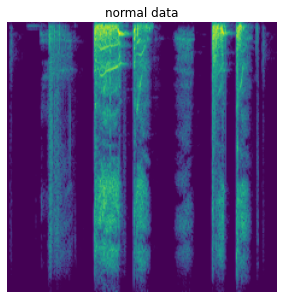

In [ ]:
plt.figure(figsize=(28,28))
plt.subplot(1,5,1)
plt.axis("off")
plt.title("normal data")
plt.imshow(img0)

In [ ]:
import numpy as np
import random
import itertools
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
def load_audio_file(file_path):
    input_length = 16000*5
    data = librosa.core.load(file_path)[0]
    if len(data)>input_length:
        data = data[:input_length]
    else:
        data = np.pad(data, (0, max(0, input_length - len(data))), "constant")
    return data
def plot_time_series(data):
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()

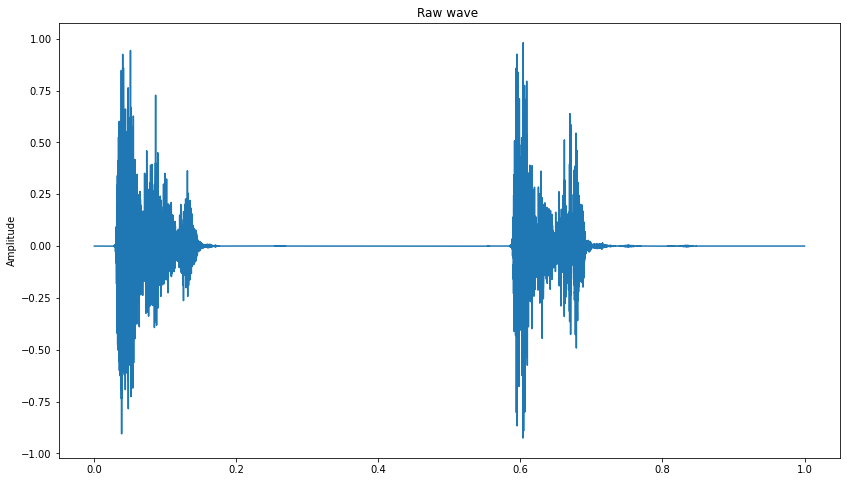

In [ ]:
data = load_audio_file("/content/dataset_base/lower/18722fbe-d240-457a-a0fc-2d9d09bfbcc81.wav")
plot_time_series(data)

In [ ]:
ipd.Audio(data, rate=16000)

#Additionally#



For previous version of dataset when cough extracted with cp1.speechpro.com detector


## extract only cough sounds from wav file and store wav only with cough to new folder##

we will use test detector from cp1.speechpro.com to detect cough in sound and it location it timeline.

#TODO #
sdkm exeption cannot convert float infinity to integer -responce from cp1.speechpro.com server means wav have some problems.

In [ ]:
%cd /content/
%rm -rf dataset_mod

/content


In [ ]:
#creating new directory for modificated sounds
%cd /content/
%mkdir dataset_mod
%cd /content/dataset_mod/
%mkdir covid

/content
/content/dataset_mod


In [ ]:
%cd /content/
import time
from pydub import AudioSegment, effects
import requests
import json
import base64
import wave
from requests.packages.urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

def get_rec_base64(record):
    try:
        enc = base64.b64encode(record)
        encoded_string = str(enc, 'ascii','ignore')
    except ValueError as e:
        print('problem with sound file to base64 string encoding' + str(e))
    return encoded_string

def recieve_session_id():
  headers = {
    "Content-type": "application/json;charset=UTF-8",
    "Accept": "application/json",
    }
  data = {
      "username": "vk_user",
      "domain_id": "201",
      "password": "123",
      }
  url = 'https://cp1.speechpro.com/vksession/rest/session'

  r = requests.post(url, headers=headers, data=json.dumps(data))

  print('Response: %s' % r.text)

  parsed_string = json.loads(r.text)
  if "reason" in parsed_string:
      #print('Mistake - %s' % parsed_string["reason"])
      flag_session_id_recieved = 0

  if "session_id" in parsed_string:
      #print('session_id - %s' % parsed_string["session_id"])
      flag_session_id_recieved = 1 

  return flag_session_id_recieved, parsed_string["session_id"]

################################################################################
# main code
flag_session_id_recieved = 0
session_id = ""
proxy = {'http':None,'https':None,}

if True:
    # resieving all events list
    preset = "test4class_model" # 1 second quantification
    #preset = "neuroear_openspace" #worked 4 seconds
    #preset = "neuroear_medicine"  # worked 4 seconds
    #preset = "neuroear_office" # worked 4 seconds
    #preset = "neuroear_household" #worked 4 seconds
    #preset = "neuroear_music" #worked 4 seconds

    url_session = 'https://cp1.speechpro.com/vked/rest/{}/segment'.format(preset)
    
    all_files = os.listdir('./dataset/covid/')
    
    if len(all_files) > 0:
      counter_of_files = 0
      problem_files = 0
      time_started_session = 0

      for file_name in all_files:
        print(file_name)
        found_covid = 0
        #renew session if expired
        if time.time() - time_started_session > 300 or flag_session_id_recieved == 0: # 5 minutes
          flag_session_id_recieved, session_id = recieve_session_id()
          headers_session = {
                            "Content-type": "application/json; charset=UTF-8",
                            "Accept": "application/json",
                            "X-Session-ID": session_id,
                            }
          time_started_session = time.time()                   

        file_name_split = file_name.split(".")
        if file_name_split[1] == "json":
          json_data = json.load(open("./dataset/covid/"+file_name, "r"))
          print(file_name)
          if float(json_data["cough_detected"]) > 0.85:
            if "expert_labels_1" in json_data:
              if "diagnosis" in json_data["expert_labels_1"]:
                if "COVID" in json_data["expert_labels_1"]["diagnosis"]:
                  found_covid = 1
            if "expert_labels_2" in json_data:     
              if "diagnosis" in json_data["expert_labels_2"]:
                if "COVID" in json_data["expert_labels_2"]["diagnosis"]:
                  found_covid = 1
            if "expert_labels_3" in json_data:     
              if "diagnosis" in json_data["expert_labels_3"]:
                if "COVID" in json_data["expert_labels_3"]["diagnosis"]:
                  found_covid = 1        

            #if "status" in json_data:
              #if "COVID" in json_data["status"]:
            if flag_session_id_recieved == 1:
              if found_covid == 1:  
                print(json_data)
                #file read bynary "rb"
                file_name = "./dataset/covid/"+file_name_split[0]+".wav"

                # not worked in colab
                file_record = open(file_name, "rb")
                file_context = file_record.read()
                file_string=get_rec_base64(file_context)

                try:
                  r = requests.post(url_session, \
                                    proxies=proxy, \
                                    verify=False, \
                                    data='{"data":"' + file_string +'"}', \
                                    headers=headers_session, \
                                    timeout=30.0)
                  #print(r.content)
                  if r.status_code == 200 :
                    result = json.loads(r.content)
                    print('Detected: %s' % result)
                  else:
                    print('Bad response from server!')
                    print(r.content)
                    problem_files += 1
                    continue
                except requests.exceptions.RequestException as err:
                  print(err)

                #Cough timeline detection
                cough_seconds_arr = []
                for events in result['events'].values():
                  cough_seconds_arr.append(0)
                i = 0
                for events in result['events'].values():
                  for event in events:
                    probability_val = round(event['probability'],2)
                    info_val = event['info']
                    info_vals = info_val.split(",")
                    dbfs = info_vals[0].split(":")
                    max_dbfs = info_vals[1].split(":")
                    dbfs_val = int(dbfs[1].strip())
                    max_dbfs_val = int(max_dbfs[1].strip())
                    if probability_val > 0.4 and event['event_name'] =='Cough' and dbfs_val >= -40 and max_dbfs_val >= -20:
                      cough_seconds_arr[i] = 1
                  i += 1
                  #print(info_val)
                  #print(dbfs_val)
                  #print(max_dbfs_val)

                
                print("Detected array of Cough (second in which cough probability is > 40%")  
                print(cough_seconds_arr)
                print("Lenght of sound in seconds returned from cp1:"+str(len(cough_seconds_arr)))

                all_sound_rec = AudioSegment.from_wav(file_name)
                print("Real length of sound in millicesonds:"+str(len(all_sound_rec))) 

                #cutting cough sound record from first and last non cough events
                start_sound_position = 0
                end_sound_position = len(all_sound_rec)

                for sec_record in cough_seconds_arr:
                  if sec_record != 0:
                    break
                  else:
                    start_sound_position += 1000

                for sec_record in reversed(cough_seconds_arr):
                  if sec_record != 0:
                    break
                  else:
                    if end_sound_position%1000 > 0:
                      end_sound_position = end_sound_position-end_sound_position%1000
                    else:
                      end_sound_position = end_sound_position-1000
                #delete non round 1000 millisec last interval
                end_sound_position = end_sound_position-end_sound_position%1000

                print("New sound segment with cough event:"+str(start_sound_position)+"-"+str(end_sound_position))

                #save new sound segment
                sound_segment = all_sound_rec[start_sound_position:end_sound_position]
                sound_segment.export("./dataset_mod/covid/"+file_name_split[0]+".wav", format="wav")
                copyfile("./public_dataset/"+file_name_split[0]+".json", "./dataset_mod/covid/"+file_name_split[0]+".json")        
                
                counter_of_files += 1
                if counter_of_files >= 100000:
                  break  

    print("Skipped problem files: "+ str(problem_files))
    print("Good files:"+str(counter_of_files))